In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['CID','Gender','Age','AnnualIncome','SpendingScore']
df.head()

,CID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,-2:]
x.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
x.shape

(200, 2)

In [8]:
x.isnull().sum()

AnnualIncome     0
SpendingScore    0
dtype: int64

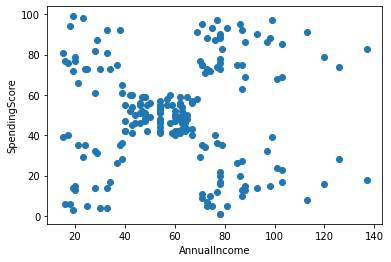

In [5]:
plt.scatter(x['AnnualIncome'],x['SpendingScore'])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

WCSS
 [269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30241.343617936585, 24986.52564064288, 21884.744095710274, 19746.911957660894, 18040.77401933825, 15989.225605308671, 14529.60292207792, 13186.081506797294, 11979.263231376468, 10913.784400747469, 9974.26812076812, 9190.816241407547, 8843.187558640191]


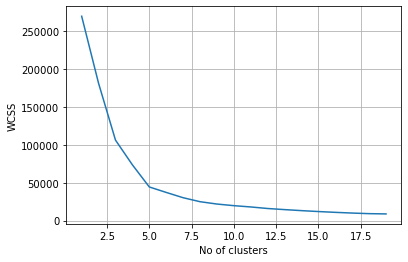

In [12]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,20): # i = no of clusters,i=1,2,3,...19
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,20)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [13]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at K={i}',silhouette_score(x,m.labels_))

Silhoutte Score at K=2 0.2968969162503008
Silhoutte Score at K=3 0.46761358158775435
Silhoutte Score at K=4 0.4931963109249047
Silhoutte Score at K=5 0.553931997444648
Silhoutte Score at K=6 0.53976103063432
Silhoutte Score at K=7 0.5314247434775297
Silhoutte Score at K=8 0.4575689106804838
Silhoutte Score at K=9 0.45977797620553973


#### Optimal number of clusters = 5

In [14]:
k5 = KMeans(n_clusters=5)
k5.fit(x)
ypred5 = k5.predict(x)
print(ypred5)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 4 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [15]:
from collections import Counter
c1 = Counter(ypred5)
print(c1)

Counter({4: 81, 2: 39, 0: 35, 3: 23, 1: 22})


In [16]:
cent5 = k5.cluster_centers_
print(cent5)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [17]:
df['Cls5'] = ypred5

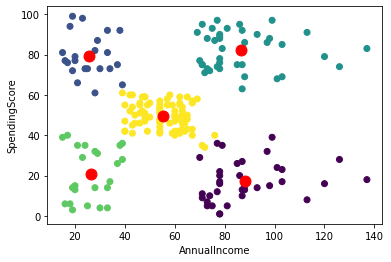

In [19]:
plt.scatter(x['AnnualIncome'],x['SpendingScore'],c=df['Cls5'])
plt.scatter(cent5[:,0],cent5[:,1],color='red',s=120)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

#### Cluster Profiling

In [27]:
df.columns

Index(['CID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore', 'Cls5'], dtype='object')

In [31]:
res = df.iloc[:,3:].groupby('Cls5').mean()
res

,AnnualIncome,SpendingScore
Cls5,,
0,88.200000,17.114286
1,25.727273,79.363636
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


In [36]:
res1 = pd.DataFrame({'AnnualIncome':df['AnnualIncome'].mean(),
                   'SpendingScore':df['SpendingScore'].mean()},index=['Avg'])
res1

,AnnualIncome,SpendingScore
Avg,60.56,50.2


In [37]:
profiling = pd.concat([res1,res])
profiling

,AnnualIncome,SpendingScore
Avg,60.560000,50.200000
0,88.200000,17.114286
1,25.727273,79.363636
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


In [ ]:
# cls0 - High AnnualIncome, low spending score
# cls1 - Low AnnualIncome, High spending score
# cls2 - High AnnualIncome, High spending score
# cls3 - Low AnnualIncome, Low spending score
# cls4 - medium AnnualIncome, medium spending score